1.https://www.kaggle.com/datasets/asaniczka/median-and-avg-hourly-wages-in-the-usa-1973-2022 

А. Этот набор данных дает ценную информацию о медианной и средней почасовой заработной плате в США с 1973 по 2022 год. Представленные данные - реальные.

B.
year
Year of the data point (type: int)

median
Median hourly wage for all workers (type: float)

average
Average hourly wage for all workers (type: float)

men_median
Median hourly wage for men (type: float)

men_average
Average hourly wage for men (type: float)

women_median
Median hourly wage for women (type: float)

women_average
Average hourly wage for women (type: float)

white_median
Median hourly wage for white workers (type: float)

white_average
Average hourly wage for white workers (type: float)

Для упрощения работы выбереме со 2 по 7 столбец включительно

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("C:\\Users\\HP\\Desktop\\median_average_wages.csv")

выберем столбцы с числовыми значениями которые можно анализировать

In [14]:
dataset_numeric = dataset.iloc[:,1:7]

3.a. 
 Определить среднее значение, СКО.

In [11]:
mean_value, sko_value = {}, {}
for atr in dataset_numeric: 
    mean_value[atr] = dataset_numeric[atr].mean()
    sko_value[atr] = dataset_numeric[atr].std()

mean_value.get('median')    

20.2616

3.b. 
Построить гистограмму распределения значений, определить есть ли выбросы

	Distribution


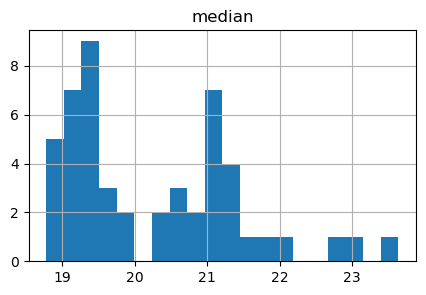

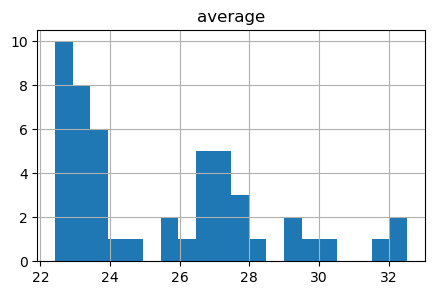

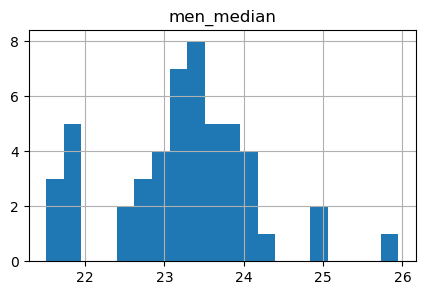

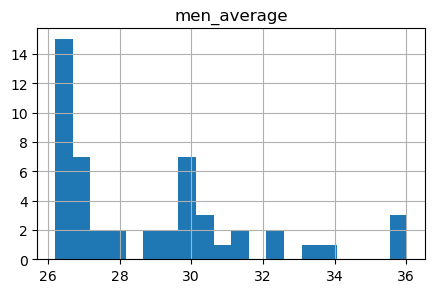

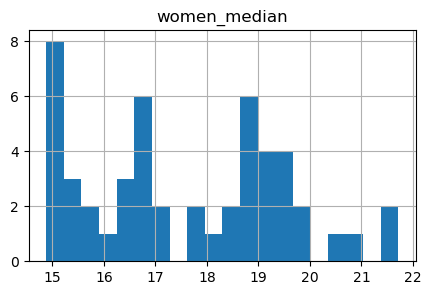

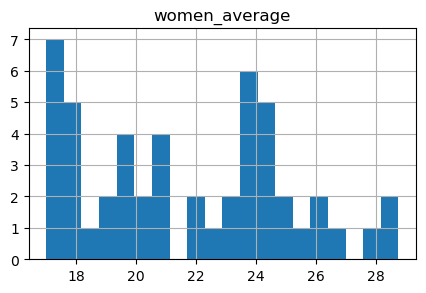

In [26]:
print("\tDistribution")
for atr in dataset_numeric:
    plt.figure(figsize = (5,3))
    plt.hist(dataset_numeric[atr], bins = 20)
    plt.grid(True)
    plt.title(atr)

Количество выбросов можно проверить и более точнее:

In [17]:
for atr in dataset_numeric.columns:
    q1=dataset_numeric[atr].quantile(0.25)
    q3=dataset_numeric[atr].quantile(0.75)
    IQR=q3-q1
    outliers = dataset_numeric[atr][((dataset[atr]<(q1-1.5*IQR)) | (dataset_numeric[atr]>(q3+1.5*IQR)))]
    print(f"Количество выбросов в {atr} : {str(len(outliers))}")

Количество выбросов в median : 0
Количество выбросов в average : 0
Количество выбросов в men_median : 1
Количество выбросов в men_average : 3
Количество выбросов в women_median : 0
Количество выбросов в women_average : 0


визуализировать количество выбросов можно следующим образом, возьмем столбец где наибольшее их кол-во(men_average):

Text(0.5, 1.0, 'Distribution')

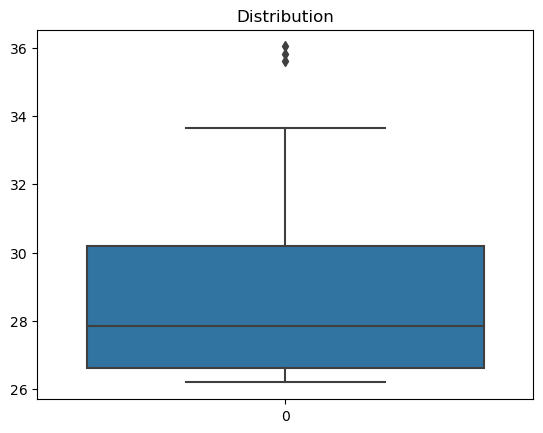

In [27]:
ax = sns.boxplot(dataset_numeric.men_average)
plt.title('Distribution')

Box plot — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей. Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

- Минимальное наблюдаемое значение (0-й процентиль) — минимальная точка данных выборки, отображается началом левого «уса»;
- Максимальное наблюдаемое значение выборки (100-й процентиль) — максимальная точка данных выборки, отображается концом правого «уса»;
- Медиана (50-процентиль) — отображается чертой, разделяющей «ящик» на две части;
- 1-й квартиль или 25-й процентиль — представляется левой стороной «ящика»;
- 3-й квартиль или 75-й процентиль — представляется правой стороной «ящика»;
- Отметки, отображаемые на диаграмме кружками, представляют собой выбросы данных.

3.c,d.
Определить количество пропущенных значений:

In [19]:
dataset_numeric.isna().sum()

median           0
average          0
men_median       0
men_average      0
women_median     0
women_average    0
dtype: int64

В моем датасете не оказалось пропущенных значений, но есть разные способы обработки пропущенных значений, вот один из них:

Замена пропущенных значений средним, медианой или модой — грубый способ работы с ними. В зависимости от ситуации, например, если вариация данных невелика, или эта переменная мало влияет на выходную, такая грубая аппроксимация, возможно, приемлема и даст удовлетворительные результаты.

4.a,b. 
Определить, какие атрибуты высококоррелированы и характер их корреляции, а также какие атрибуты не имеют корреляцию.

In [23]:
corr = dataset_numeric.corr()
corr.style.background_gradient(cmap = 'RdYlGn', axis=None)

,median,average,men_median,men_average,women_median,women_average
median,1.000000,0.969651,0.549828,0.968771,0.930146,0.926018
average,0.969651,1.000000,0.429853,0.987328,0.966652,0.976627
men_median,0.549828,0.429853,1.000000,0.550493,0.256779,0.243820
men_average,0.968771,0.987328,0.550493,1.000000,0.920645,0.931964
women_median,0.930146,0.966652,0.256779,0.920645,1.000000,0.993533
women_average,0.926018,0.976627,0.243820,0.931964,0.993533,1.000000


Один из способов количественной оценки взаимосвязи между двумя переменными — использовать коэффициент корреляции Пирсона, который является мерой линейной связи между двумя переменными.

Принимает значение от -1 до 1, где:

-1 указывает на совершенно отрицательную линейную корреляцию.
0 указывает на отсутствие линейной корреляции.
1 указывает на абсолютно положительную линейную корреляцию.
Чем дальше коэффициент корреляции от нуля, тем сильнее связь между двумя переменными.
Все коэффициенты корреляции по диагонали таблицы равны 1, потому что каждая переменная коррелирует сама с собой.

Таким образом, высококоррелированы атрибуты average - men_average; women_average - women_median. А слабее всего корреляция между women_average - men_median.

4.c. 
Построить матрицы графиков рассеивания.

Построить график рассеивания, например, атрибутов women_average - women_median можно так:

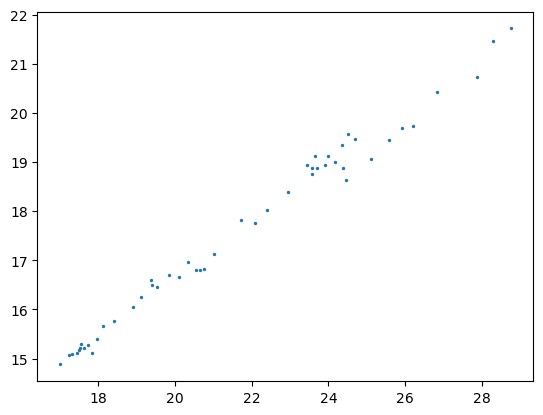

In [24]:
plt.scatter(dataset_numeric.women_average, dataset_numeric.women_median, s = 2)

Построить матрицу графиков рассеивания можно так

array([[<Axes: xlabel='median', ylabel='median'>,
        <Axes: xlabel='average', ylabel='median'>,
        <Axes: xlabel='men_median', ylabel='median'>,
        <Axes: xlabel='men_average', ylabel='median'>,
        <Axes: xlabel='women_median', ylabel='median'>,
        <Axes: xlabel='women_average', ylabel='median'>],
       [<Axes: xlabel='median', ylabel='average'>,
        <Axes: xlabel='average', ylabel='average'>,
        <Axes: xlabel='men_median', ylabel='average'>,
        <Axes: xlabel='men_average', ylabel='average'>,
        <Axes: xlabel='women_median', ylabel='average'>,
        <Axes: xlabel='women_average', ylabel='average'>],
       [<Axes: xlabel='median', ylabel='men_median'>,
        <Axes: xlabel='average', ylabel='men_median'>,
        <Axes: xlabel='men_median', ylabel='men_median'>,
        <Axes: xlabel='men_average', ylabel='men_median'>,
        <Axes: xlabel='women_median', ylabel='men_median'>,
        <Axes: xlabel='women_average', ylabel='men_median'>]

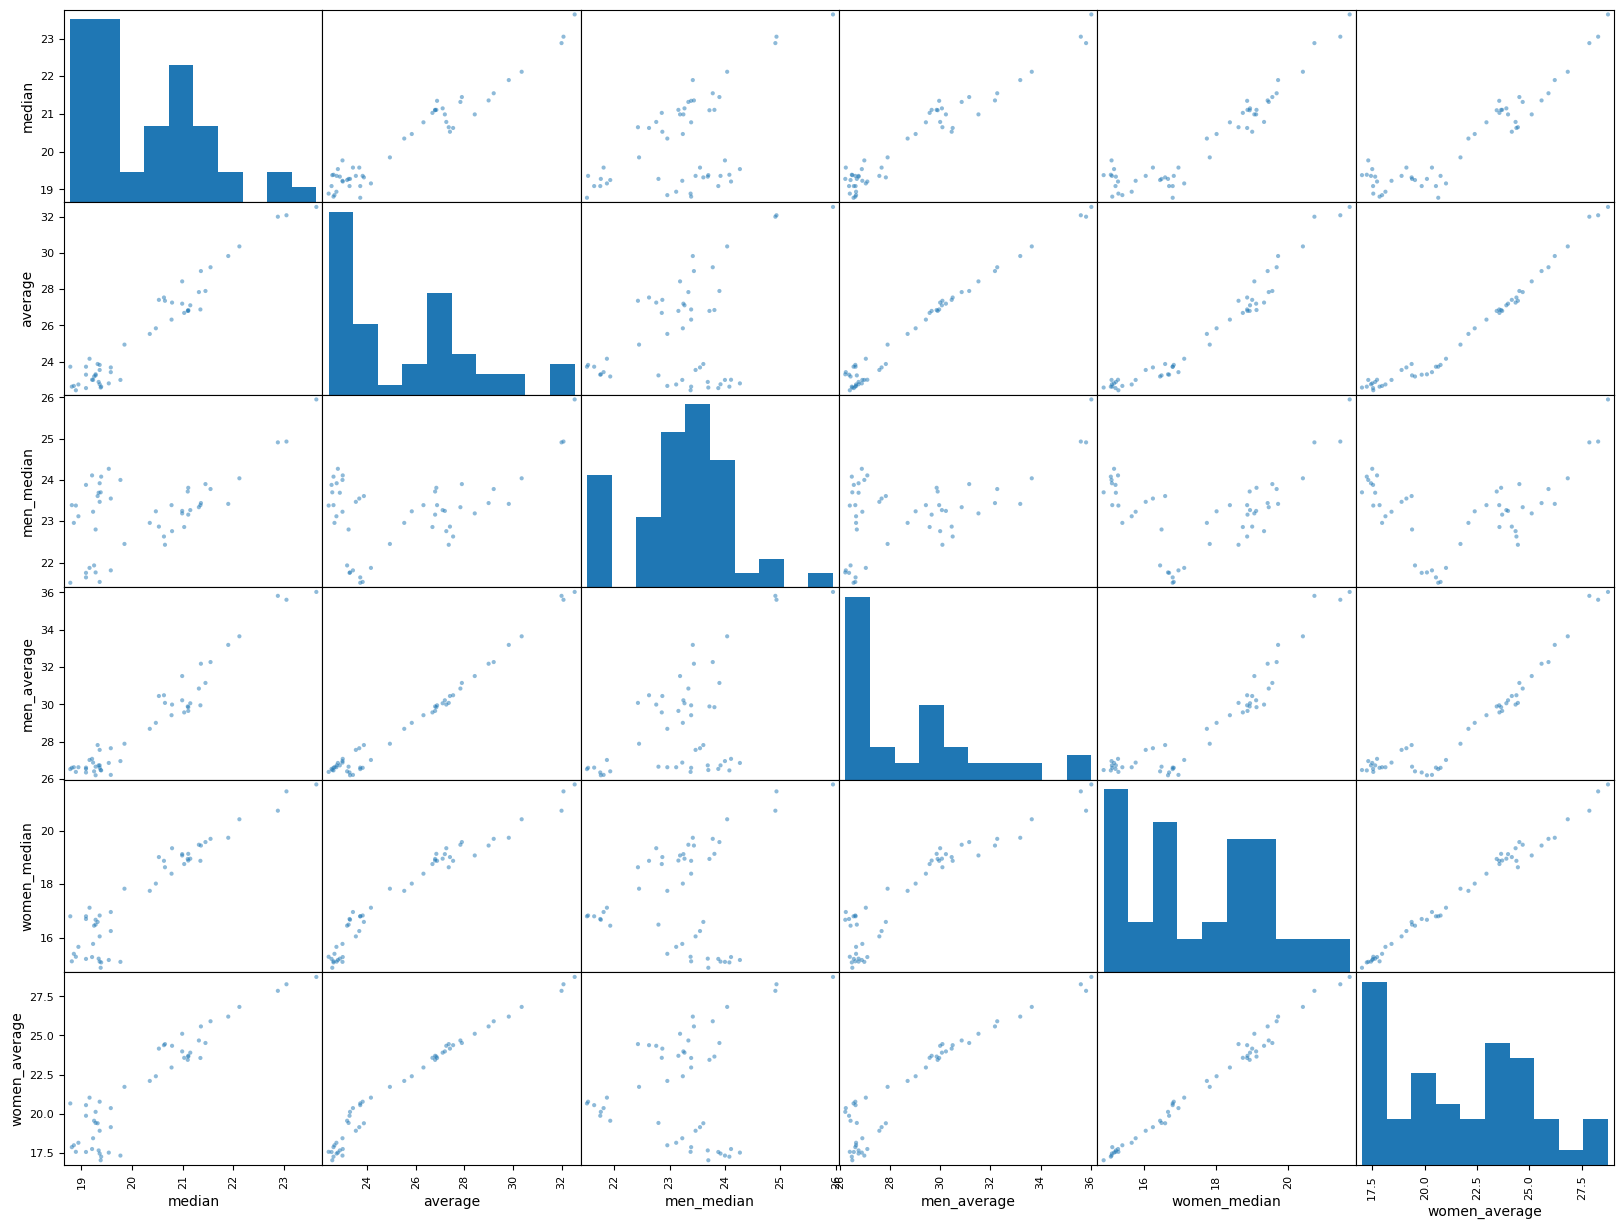

In [25]:
pd.plotting.scatter_matrix(dataset_numeric, figsize=(20, 15))

Диаграмма разброса применяется для определения зависимости двух величин друг от друга. То, что связь есть, однозначно утвержать нельзя, но ее отсутствие сказать можно наверняка. Признаки наличия зависимости являются лишь предпосылкой для дальнейшего исследования.
Но тем не менее, в паттернах где точки в +- случайном/редком друг от друга расположении (например average - men_median; men_median - women_average и им подобные) мы можем сказать что зависимости никакой не прослеживается, в частности отсутствует.
А в women_average - women_median и им подобным, мы можем предположить, что зависимость (возможно!!!) есть.